In [34]:
# 共通で利用するライブラリ
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

# warnings.filterwarnings('ignore')
np.set_printoptions(suppress=True, precision=3)
pd.options.display.float_format = '{:.3f}'.format
pd.set_option("display.max_columns", None)
plt.style.use('seaborn')
plt.rcParams["font.size"] = 14
plt.rcParams['font.family'] = 'IPAexGothic'
%matplotlib inline

# 追加するライブラリ
from IPython.display import clear_output
from ipywidgets import Dropdown, SelectMultiple, IntSlider, ToggleButtons, DatePicker
import datetime

## Ch.03 可視化の仕組みを構築する

- ダッシュボードとは
  - 複数のグラフやデータ等の情報を1つにまとめて、ひと目でデータを把握できるようにするデータ可視化ツール

データ一覧

- m_area.csv
  - 地域マスタ
  - 都道府県情報等
- m_store.csv
  - 店舗マスタ
  - 店舗名等
- tbl_order_202004.csv
  - 注文データ
  - 4月分
- tbl_order_202005.csv
  - 注文データ
  - 5月分
- tbl_order_202006.csv
  - 注文データ
  - 6月分

### Knock21: 店舗を絞り込んで可視化できるようにする

In [18]:
# データの読み込みと結合と修正

# データの読み込み
m_store = pd.read_csv("../support/本章/3章/m_store.csv")
m_area = pd.read_csv("../support/本章/3章/m_area.csv")
order_data = pd.read_csv("../support/本章/3章/tbl_order_202004.csv")

# データの結合
order_data = pd.merge(order_data, m_store, on="store_id", how="left")
order_data = pd.merge(order_data, m_area, on="area_cd", how="left")

# マスタデータにないコードに対応した文字列を設定
# "takeout_name", "status_name"
# 名称の設定（お渡し方法）
order_data.loc[order_data["takeout_flag"] == 0, "takeout_name"] = "デリバリー"
order_data.loc[order_data["takeout_flag"] == 1, "takeout_name"] = "お持ち帰り"

# 名称の設定（注文状態）
order_data.loc[order_data["status"] == 0, "status_name"] = "受付"
order_data.loc[order_data["status"] == 1, "status_name"] = "お支払い済"
order_data.loc[order_data["status"] == 2, "status_name"] = "お渡し済"
order_data.loc[order_data["status"] == 9, "status_name"] = "キャンセル"

print(order_data.shape)
display(order_data)

(233260, 16)


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払い済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
3,28447783,190,C41156423,19,73032165,2020-04-01 11:00:00,2020-04-01 11:16:00,0,2732,2,栃木店,TO,北関東,栃木,デリバリー,お渡し済
4,32576156,191,C54568117,71,23281182,2020-04-01 11:00:00,2020-04-01 11:53:00,0,2987,2,伊勢崎店,GU,北関東,群馬,デリバリー,お渡し済
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233255,25546308,3,C24617924,46,3700904,2020-04-30 21:58:58,2020-04-30 22:19:58,0,2615,2,足立店,TK,東京,東京,デリバリー,お渡し済
233256,91693481,45,C68997855,6,37852755,2020-04-30 21:58:58,2020-04-30 22:13:58,0,2732,2,池尻店,TK,東京,東京,デリバリー,お渡し済
233257,57908119,36,C16123702,81,90372382,2020-04-30 21:58:58,2020-04-30 22:47:58,0,2363,2,新宿店,TK,東京,東京,デリバリー,お渡し済
233258,7145625,174,C80733640,75,48265986,2020-04-30 21:58:58,2020-04-30 22:32:58,0,2238,2,新座店,SA,埼玉,埼玉,デリバリー,お渡し済


In [19]:
# 複数店舗の詳細表示
# ipywidgetsの機能を実装（ドロップダウン）

def order_by_store(val: list):
    """
    ipywidgetsの実装（ドロップダウン）
    ドロップダウンで店舗を選べるようにする
    """
    clear_output()
    display(dropdown)
    pick_data = order_data.loc[
        (order_data["store_name"] == val["new"]) &
        (order_data["status"].isin([1, 2]))
    ]
    # display(pick_data.head())
    display(pick_data)

store_list = m_store["store_name"].tolist()

dropdown = Dropdown(options=store_list)
dropdown.observe(order_by_store, names="value")
display(dropdown)

Dropdown(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛西店', '…

In [20]:
# 店舗ごとの週単位の売上表示（折れ線グラフ）
# ipywidgetsの機能を実装（ドロップダウン）

def graph_by_store(val: list):
    """
    抽出した各店舗の注文データを可視化
    （折れ線グラフ）
    """
    clear_output()
    display(dropdown2)
    pick_data = order_data.loc[
        (order_data["store_name"] == val["new"]) &
        (order_data["status"].isin([1, 2]))
    ]
    temp = pick_data[["order_accept_date", "total_amount"]].copy()
    temp.loc[:, "order_accept_date"] = pd.to_datetime(temp["order_accept_date"])
    temp.set_index("order_accept_date", inplace=True)
    temp.resample("D").sum().plot()

dropdown2 = Dropdown(options=store_list)
dropdown2.observe(graph_by_store, names="value")
display(dropdown2)

Dropdown(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛西店', '…

### Knock22: 複数店舗の詳細を可視化できるようにする

In [21]:
# 複数店舗の詳細表示
# ipywidgetsの機能を実装（セレクトボックス）

def order_by_multi(val: list):
    """
    オーダー情報に対して、
    セレクトボックスで選んだ店舗の詳細情報を表示する
    """
    clear_output()
    display(select)
    pick_data = order_data.loc[
        (order_data["store_name"].isin(val["new"])) &
        (order_data["status"].isin([1, 2]))
    ]
    display(pick_data)

select = SelectMultiple(options=store_list)
select.observe(order_by_multi, names="value")
display(select)

SelectMultiple(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛…

In [22]:
# 複数店舗のグラフ表示
# ipywidgetsの機能を実装（セレクトボックス）

def graph_by_multi(val: list):
    """
    抽出した複数店舗の注文データを可視化
    （折れ線グラフ）
    """
    clear_output()
    display(select2)

    fig = plt.figure(figsize=(17, 4))
    plt.subplots_adjust(wspace=0.25, hspace=0.6)

    i = 0

    for trg in val["new"]:
        pick_data = order_data[
            (order_data["store_name"] == trg) &
            (order_data["status"].isin([1, 2]))
        ]
        temp = pick_data[["order_accept_date", "total_amount", "store_name"]].copy()
        temp.loc[:, "order_accept_date"] = pd.to_datetime(temp["order_accept_date"])
        temp.set_index("order_accept_date", inplace=True)
        i += 1
        ax = fig.add_subplot(1, len(val["new"]), i)
        ax.plot(temp.resample("D").sum())
        ax.set_title(trg)

select2 = SelectMultiple(options=store_list)
select2.observe(graph_by_multi, names="value")
display(select2)

SelectMultiple(options=('昭島店', 'あきる野店', '足立店', '北千住店', '綾瀬店', '荒川店', '東尾久店', '板橋店', '高島平店', '稲城店', '江戸川店', '西葛…

### Knock23: スライドバーを用いてオーダー件数を調べる

In [31]:
# スライドバーで指定した数値より下回るオーダー件数の店舗表示
# ipywidgetsの機能を実装（スライドバー）

def store_lower(val: list):
    """指定したオーダー件数を下回る店舗を表示"""
    clear_output()
    display(slider)
    temp = order_data.groupby("store_name")
    print(temp.size()[temp.size() < val["new"]])

slider = IntSlider(value=1100, min=1000, max=2000, step=100, description="件数:",)
slider.observe(store_lower, names="value")
display(slider)

IntSlider(value=1600, description='件数:', max=2000, min=1000, step=100)

store_name
あきる野店     1147
さいたま南店    1500
さいたま緑店    1021
さいたま西店    1170
つくば店      1265
          ... 
高津店       1115
高田馬場店     1065
鴻巣店       1114
鶴見店       1479
麻生店       1346
Length: 194, dtype: int64


In [30]:
# スライドバーで指定した数値より上回るオーダー件数の店舗表示
# ipywidgetsの機能を実装（スライドバー）

def store_upper(val: list):
    """指定したオーダー件数を上回る店舗を表示"""
    clear_output()
    display(slider2)
    temp = order_data.groupby("store_name")
    print(temp.size()[temp.size() > val["new"]])


slider2 = IntSlider(value=1600, min=1000, max=2000,step=100, description="件数:",)
slider2.observe(store_lower, names="value")
display(slider2)


IntSlider(value=1100, description='件数:', max=2000, min=1000, step=100)

store_name
あきる野店     1147
さいたま南店    1500
さいたま緑店    1021
さいたま西店    1170
つくば店      1265
          ... 
高津店       1115
高田馬場店     1065
鴻巣店       1114
鶴見店       1479
麻生店       1346
Length: 195, dtype: int64


### Knock24: トグルボタンで地域データを抽出する

In [27]:
# トグルボタンで地域ごとにデータを抽出
# ipywidgetsの機能を実装（トグルボタン）

area_list = m_area["wide_area"].unique()


def order_by_area(val: list):
    """押されたトグルボタンの地域に該当する店舗情報を表示する"""
    clear_output()
    display(toggle)
    pick_data = order_data.loc[
        (order_data["wide_area"] == val["new"]) &
        (order_data["status"].isin([1, 2]))
    ]
    display(pick_data)

toggle = ToggleButtons(options=area_list)
toggle.observe(order_by_area, names="value")
display(toggle)

ToggleButtons(options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='東京')

,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name
0,79339111,49,C26387220,50,67393872,2020-04-01 11:00:00,2020-04-01 11:18:00,1,4144,1,浅草店,TK,東京,東京,お持ち帰り,お支払い済
1,18941733,85,C48773811,26,91834983,2020-04-01 11:00:00,2020-04-01 11:22:00,0,2877,2,目黒店,TK,東京,東京,デリバリー,お渡し済
2,56217880,76,C66287421,36,64409634,2020-04-01 11:00:00,2020-04-01 11:15:00,0,2603,2,本郷店,TK,東京,東京,デリバリー,お渡し済
5,78384157,16,C91828823,88,38723994,2020-04-01 11:00:00,2020-04-01 11:19:00,1,2122,1,蒲田店,TK,東京,東京,お持ち帰り,お支払い済
7,83880121,77,C08085038,0,63603896,2020-04-01 11:00:00,2020-04-01 11:25:00,0,2112,2,大塚店,TK,東京,東京,デリバリー,お渡し済
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233253,70509759,61,C91583872,79,90830788,2020-04-30 21:58:58,2020-04-30 22:15:58,0,3530,2,中野店,TK,東京,東京,デリバリー,お渡し済
233254,89047729,61,C56940552,66,75279933,2020-04-30 21:58:58,2020-04-30 22:20:58,1,2677,1,中野店,TK,東京,東京,お持ち帰り,お支払い済
233255,25546308,3,C24617924,46,3700904,2020-04-30 21:58:58,2020-04-30 22:19:58,0,2615,2,足立店,TK,東京,東京,デリバリー,お渡し済
233256,91693481,45,C68997855,6,37852755,2020-04-30 21:58:58,2020-04-30 22:13:58,0,2732,2,池尻店,TK,東京,東京,デリバリー,お渡し済


ToggleButtons(options=('東京', '神奈川', '千葉', '埼玉', '北関東'), value='東京')

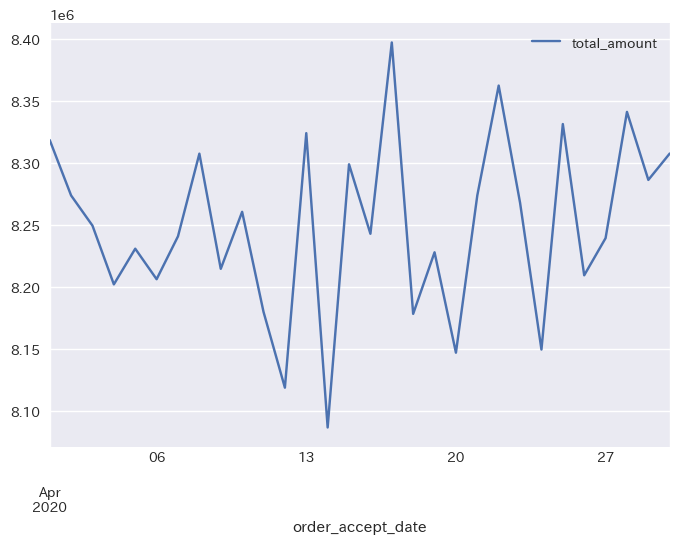

In [32]:
# トグルボタンで地域ごとのグラフを表示
# ipywidgetsの機能を実装（トグルボタン）

def graph_by_area(val: list):
    """
    押されたトグルボタンの地域に該当する
    店舗の「total_amount」を集計する
    """
    clear_output()
    display(toggle2)
    pick_data = order_data.loc[
        (order_data["wide_area"] == val["new"]) &
        (order_data["status"].isin([1, 2]))
    ]
    temp = pick_data[["order_accept_date", "total_amount"]].copy()
    temp.loc[:, "order_accept_date"] = pd.to_datetime(temp["order_accept_date"])
    temp.set_index("order_accept_date", inplace=True)
    temp.resample("D").sum().plot()

toggle2 = ToggleButtons(options=area_list)
toggle2.observe(graph_by_area, names="value")
display(toggle2)

### Knock25: 日付を指定してデータを抽出する

In [35]:
# 日付を指定してデータを抽出
# ipywidgetsの機能を実装（DatePicker）

order_data.loc[:, "order_date"] = pd.to_datetime(order_data["order_accept_date"]).dt.date

def order_by_date(val: list):
    """日付を指定してデータを絞り込む"""
    clear_output()
    display(date_picker)
    pick_data = order_data.loc[
        (order_data["order_date"] == val["new"]) &
        (order_data["status"].isin([1, 2]))
    ]
    print(pick_data.shape)
    display(pick_data)

date_picker = DatePicker(value=datetime.datetime(2020, 4, 1))
date_picker.observe(order_by_date, names="value")
display(date_picker)

DatePicker(value=datetime.date(2020, 4, 2), step=1)

(6337, 17)


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
7787,34104383,11,C65806632,57,61573513,2020-04-02 11:00:00,2020-04-02 11:39:00,1,2827,1,江戸川店,TK,東京,東京,お持ち帰り,お支払い済,2020-04-02
7788,70652318,59,C09760173,37,54068709,2020-04-02 11:00:00,2020-04-02 11:34:00,0,2827,2,巣鴨店,TK,東京,東京,デリバリー,お渡し済,2020-04-02
7790,75673365,127,C64119972,17,5287952,2020-04-02 11:00:00,2020-04-02 11:17:00,0,2308,2,戸塚店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-02
7791,9077529,174,C10231192,18,18248867,2020-04-02 11:00:00,2020-04-02 11:35:00,0,4692,2,新座店,SA,埼玉,埼玉,デリバリー,お渡し済,2020-04-02
7792,86102793,167,C06298599,21,70395221,2020-04-02 11:00:00,2020-04-02 11:59:00,1,3742,1,さいたま南店,SA,埼玉,埼玉,お持ち帰り,お支払い済,2020-04-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15565,43913148,91,C64433914,4,35504024,2020-04-02 21:58:58,2020-04-02 22:53:58,0,2312,2,伊勢原店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-02
15566,34924531,70,C49168360,84,93659072,2020-04-02 21:58:58,2020-04-02 22:20:58,0,2308,2,東久留米店,TK,東京,東京,デリバリー,お渡し済,2020-04-02
15567,84457268,7,C46462831,17,73810222,2020-04-02 21:58:58,2020-04-02 22:54:58,1,3042,1,東尾久店,TK,東京,東京,お持ち帰り,お支払い済,2020-04-02
15568,52171368,154,C88935538,94,54844864,2020-04-02 21:58:58,2020-04-02 22:52:58,0,2827,2,入間店,SA,埼玉,埼玉,デリバリー,お渡し済,2020-04-02


In [36]:
# 器官を指定してデータを抽出
# ipywidgetsの機能を実装（DatePicker）

min_date = datetime.date(2020, 4, 1)
max_date = datetime.date(2020, 4, 30)


def order_between_date():
    """
    期間が設定されると呼び出される関数
    指定された期間のデータを抽出して画面に表示する
    """
    clear_output()
    display(date_picker_min)
    display(date_picker_max)
    pick_data = order_data.loc[
        (order_data["order_date"] >= min_date) &
        (order_data["order_date"] <= max_date) &
        (order_data["status"].isin([1, 2]))
    ]
    print(pick_data.shape)
    display(pick_data)


def set_min_date(val: list):
    """最小日（期間自）の日付を変数にセットする関数"""
    global min_date
    min_date = val["new"]
    order_between_date()


def set_max_date(val: list):
    """最大日（期間至）の日付を変数にセットする関数"""
    global max_date
    max_date = val["new"]
    order_between_date()


date_picker_min = DatePicker(value=min_date)
date_picker_min.observe(set_min_date, names="value")
print("最小日")
display(date_picker_min)

date_picker_max = DatePicker(value=max_date)
date_picker_max.observe(set_max_date, names="value")
print("最大日")
display(date_picker_max)


DatePicker(value=datetime.date(2020, 4, 12), step=1)

DatePicker(value=datetime.date(2020, 4, 18), step=1)

(44374, 17)


,order_id,store_id,customer_id,coupon_cd,sales_detail_id,order_accept_date,delivered_date,takeout_flag,total_amount,status,store_name,area_cd,wide_area,narrow_area,takeout_name,status_name,order_date
85607,35576114,64,C22872511,47,93786967,2020-04-12 11:00:00,2020-04-12 11:39:00,1,2154,1,西東京店,TK,東京,東京,お持ち帰り,お支払い済,2020-04-12
85608,32092840,118,C81367714,99,24217293,2020-04-12 11:00:00,2020-04-12 11:27:00,0,2064,2,磯子店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-12
85609,42314848,29,C46151887,38,84597301,2020-04-12 11:00:00,2020-04-12 11:27:00,1,4624,1,狛江店,TK,東京,東京,お持ち帰り,お支払い済,2020-04-12
85610,95755614,20,C50860265,23,98151395,2020-04-12 11:00:00,2020-04-12 11:10:00,0,3530,2,王子店,TK,東京,東京,デリバリー,お渡し済,2020-04-12
85611,78426187,114,C48476160,14,76763751,2020-04-12 11:00:00,2020-04-12 11:25:00,0,4744,2,横須賀店,KN,神奈川,神奈川,デリバリー,お渡し済,2020-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139989,86397821,86,C75662953,8,45139349,2020-04-18 21:58:58,2020-04-18 22:29:58,0,3234,2,自由が丘店,TK,東京,東京,デリバリー,お渡し済,2020-04-18
139990,27465461,136,C40252192,69,29288502,2020-04-18 21:58:58,2020-04-18 22:16:58,0,2808,2,木更津店,CH,千葉,千葉,デリバリー,お渡し済,2020-04-18
139992,71401645,140,C01502838,24,83663793,2020-04-18 21:58:58,2020-04-18 22:45:58,0,3582,2,千葉中央店,CH,千葉,千葉,デリバリー,お渡し済,2020-04-18
139993,36724159,163,C60335724,97,27254734,2020-04-18 21:58:58,2020-04-18 22:44:58,0,2677,2,浦和店,SA,埼玉,埼玉,デリバリー,お渡し済,2020-04-18
